In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler


In [ ]:
# https://archive.ics.uci.edu/dataset/42/glass+identification
# https://vincentarelbundock.github.io/Rdatasets/datasets.html

# 1. 
Загрузите набор данных Glass из пакета “mlbench”. Набор данных (признаки, классы) был изучен в работе «Метод ближайших соседей». Постройте дерево классификации для модели, задаваемой следующей формулой: Type ~ ., дайте интерпретацию полученным результатам. При рисовании дерева используйте параметр cex=0.7 для уменьшения размера текста на рисунке, например, text(bc.tr,cex=0.7) или draw.tree(bc.tr,cex=0.7). Является ли построенное дерево избыточным? Выполните все операции оптимизации дерева.

In [219]:
names = ["Id", "RI", "Na", "Mg", "Al"," Si", "K", "Ca", "Ba", "Fe", "Type"]

In [220]:
data = pd.read_csv("glass.data", names=names)
data = data.drop(columns=["Id"])
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [221]:
from sklearn.model_selection import train_test_split
X = data.drop("Type", axis=1)
Y = data["Type"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)

In [226]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.7674418604651163

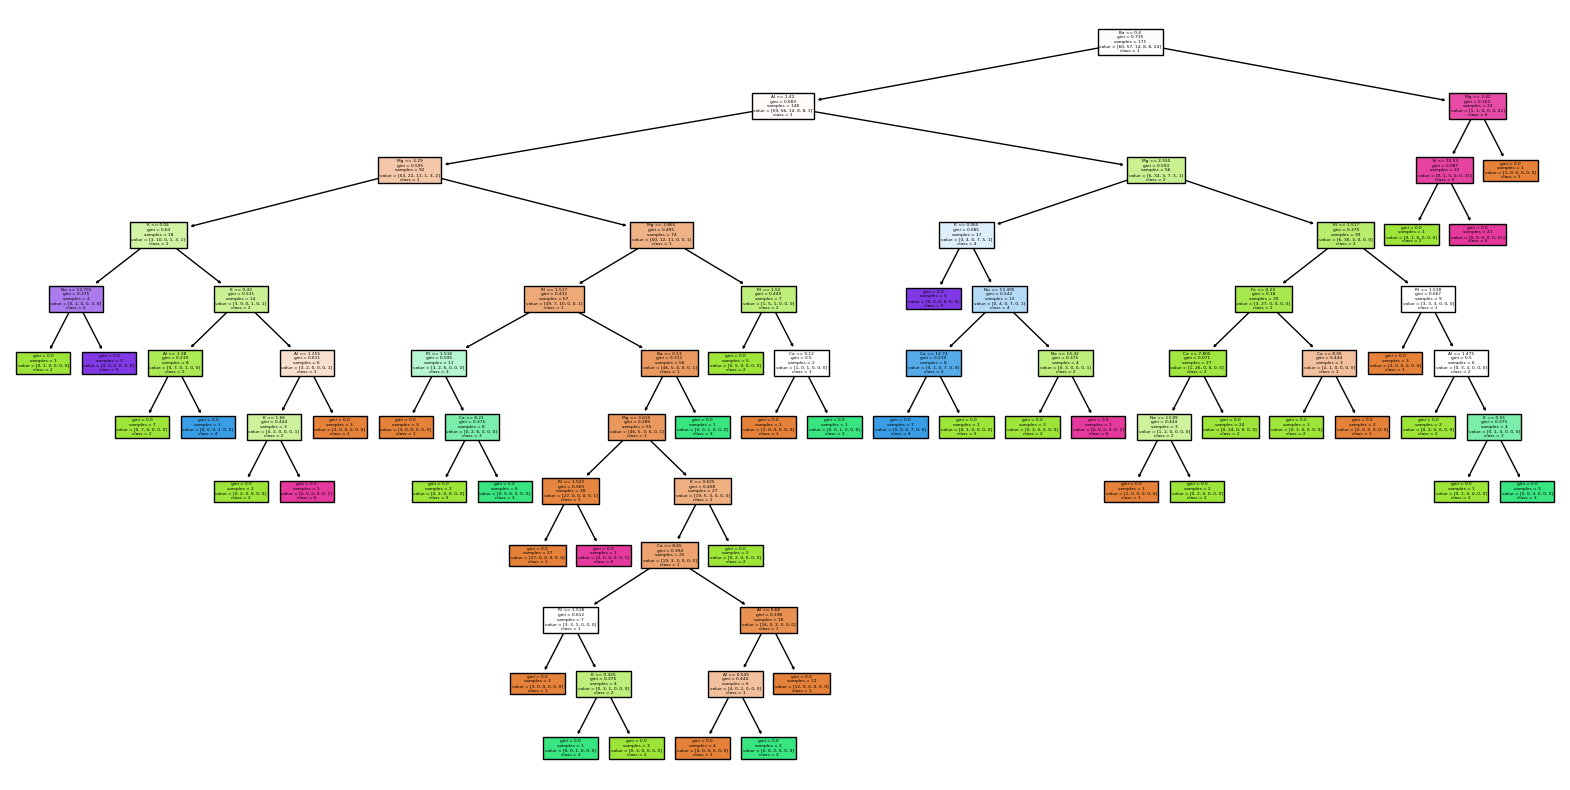

In [227]:
feature_names = list(X.columns)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=[str(i) for i in range(1, 8)])
plt.savefig("glass_first_tree.png", dpi=300)
plt.show()

In [228]:
clf = DecisionTreeClassifier(random_state=100)

param_grid = {
    'max_depth': [None, 1, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 15, 20],
}

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Точность лучшей модели:", accuracy)


Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Точность лучшей модели: 0.7441860465116279


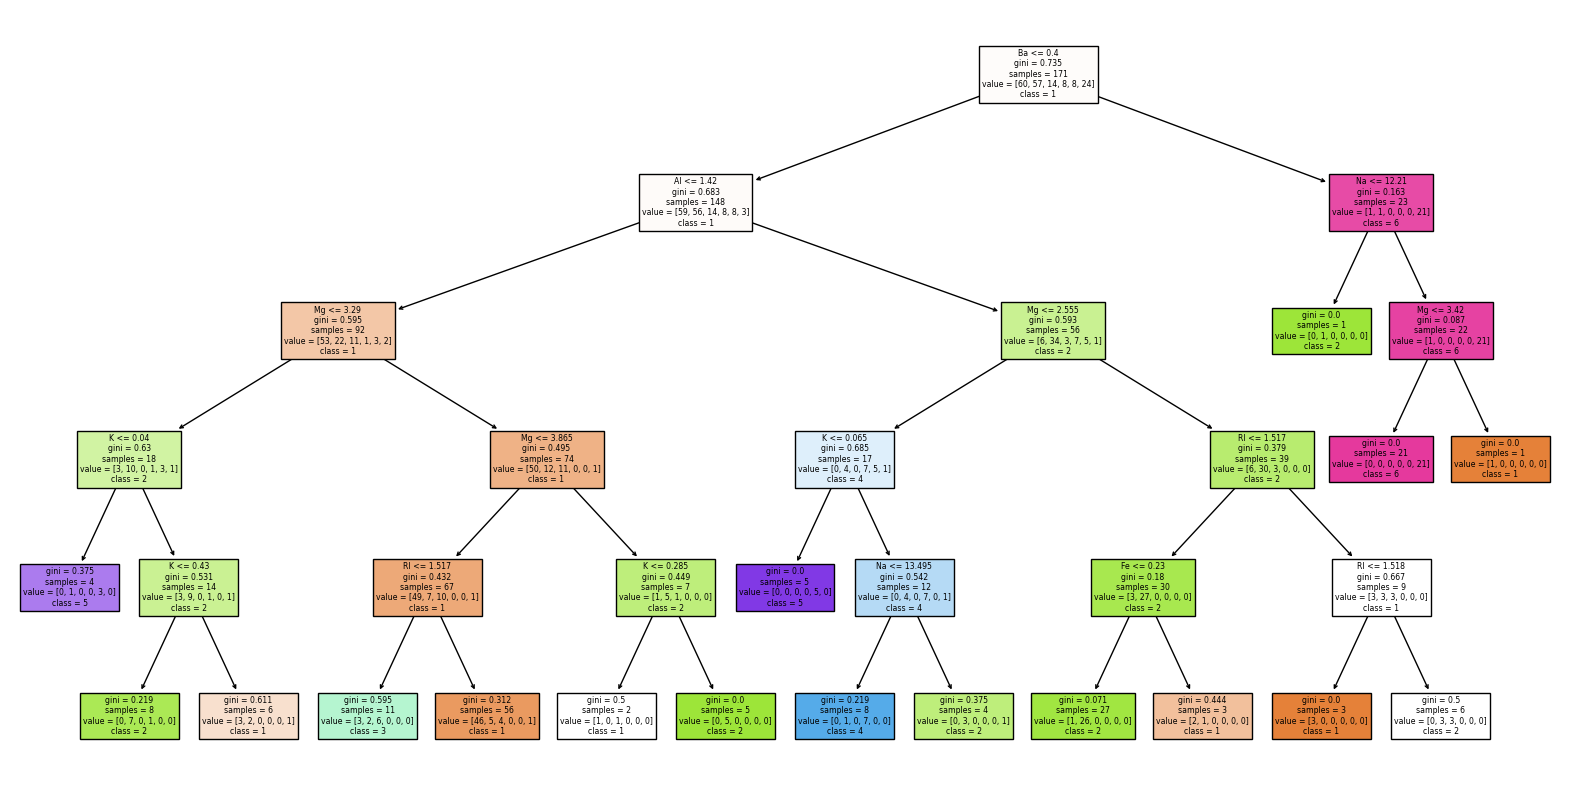

In [225]:
feature_names = list(X.columns)

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=feature_names, class_names=[str(i) for i in range(1, 8)])
plt.savefig("glass_second_optim_tree.png", dpi=300)
plt.show()

# 2. 
Загрузите набор данных spam7 из пакета DAAG. Постройте дерево классификации для модели, задаваемой следующей формулой: yesno ~., дайте интерпретацию полученным результатам. Запустите процедуру “cost-complexity prunning” с выбором параметра k по умолчанию, method = ’misclass’, выведите полученную последовательность деревьев. Какое из полученных деревьев, на Ваш взгляд, является оптимальным? Объясните свой выбор.

In [249]:
spam_data = pd.read_csv("spam7.csv")
spam_data.head()

,rownames,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [250]:
spam_data = spam_data.drop(columns=["rownames"])
spam_data["yesno"].replace(value=1, to_replace="y", inplace=True)
spam_data["yesno"].replace(value=0, to_replace="n", inplace=True)

In [251]:
spam_data.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [252]:
spam_data["yesno"].unique()

array([1, 0], dtype=int64)

In [253]:
X = spam_data.drop("yesno", axis=1)
Y = spam_data["yesno"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)

In [254]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8675352877307275

In [256]:
clf.tree_.node_count

1057

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha.

In [257]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Alpha - это параметр, который определяет степень обрезки дерева решений. Он представляет собой гиперпараметр, который позволяет контролировать компромисс между точностью модели и её сложностью. Чем больше значение ccp_alpha, тем больше уровней дерева будут удалены, что делает модель более простой и менее переобученной. ccp_alpha задает порог, при котором удаляются ветви дерева, если их вклад в уменьшение общей структурной сложности модели меньше этого значения.


Total Impurity представляет общую меру неопределенности или загрязнения в дереве решений. Это сумма меры неопределенности (например, критерий Джини или критерий Энтропии) для всех узлов и листьев дерева. total impurity важен при построении пути обрезки, так как он используется для оценки структурной сложности дерева. Цель метода cost_complexity_pruning_path - найти такое значение ccp_alpha, при котором уровни дерева начинают удаляться, но при этом общая структурная сложность (измеряемая total impurity) остается на некотором уровне.

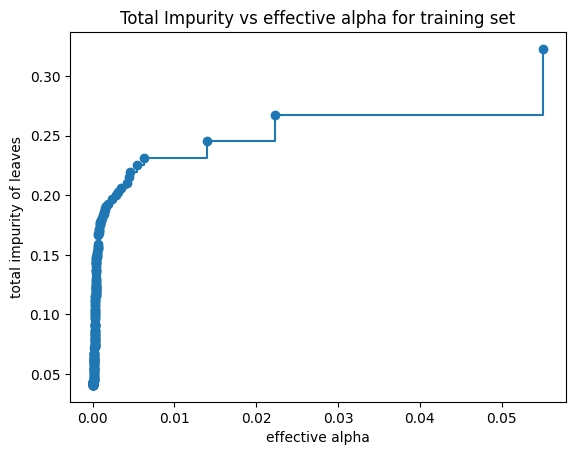

In [258]:
# In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.savefig("impurity_alpha.png")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [259]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15346747073681283


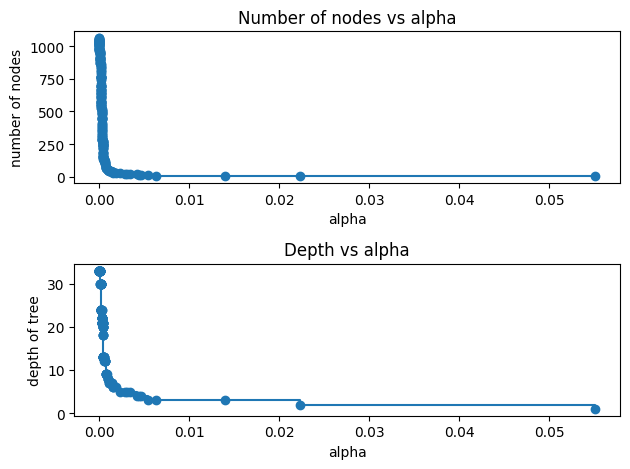

In [260]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

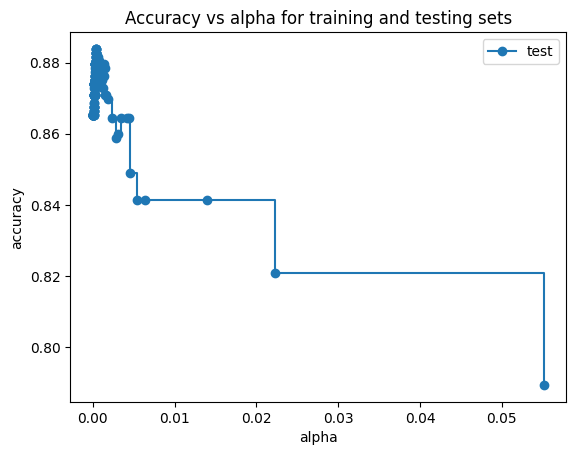

In [261]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
#ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

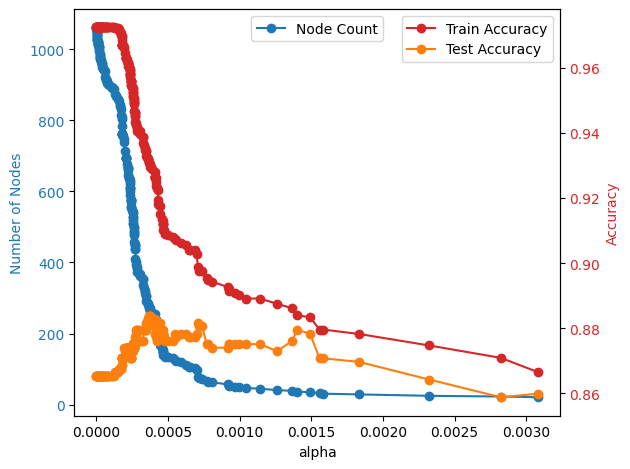

In [262]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("alpha")
ax1.set_ylabel("Number of Nodes", color='tab:blue')
ax1.plot(ccp_alphas[:-9], node_counts[:-9], marker="o", label="Node Count", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.legend(loc="upper center")

ax2 = ax1.twinx()
ax2.set_ylabel("Accuracy", color='tab:red')
ax2.plot(ccp_alphas[:-9], train_scores[:-9], marker="o", label="Train Accuracy", color='tab:red')
ax2.plot(ccp_alphas[:-9], test_scores[:-9], marker="o", label="Test Accuracy", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.legend()

fig.tight_layout()
plt.savefig("node_accuracy_alpha.png")
plt.show()

кажется, что значение alpha примерно равное 0.0015 может быть хорошим выбором, так как оно обеспечивает высокую точность на тестовых данных, и при этом связано с меньшим количеством узлов, что может снизить сложность модели и предотвратить переобучение.

In [263]:
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.0015)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8783930510314875

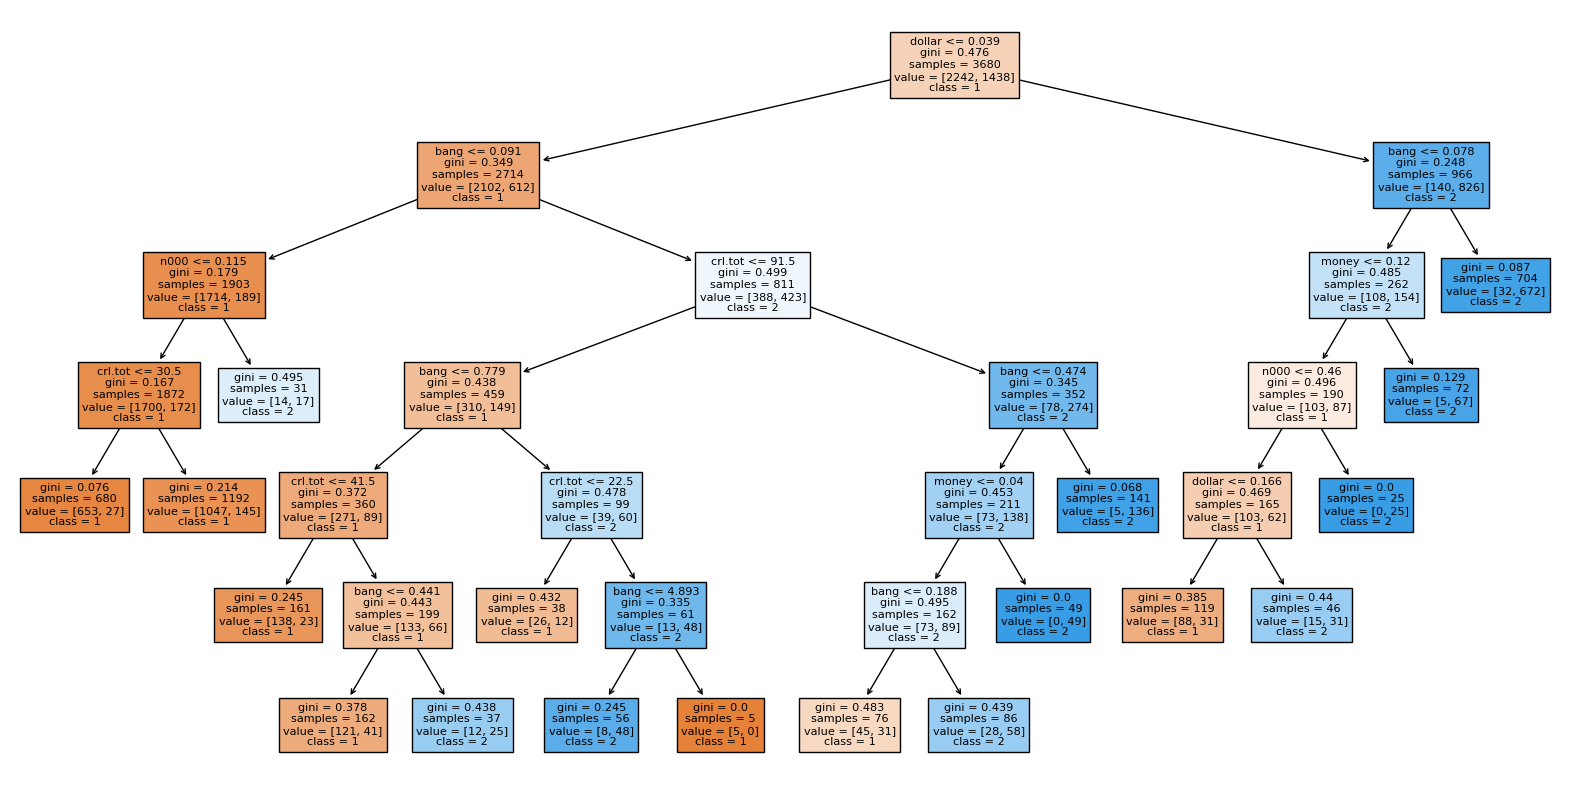

In [264]:
feature_names = list(X.columns)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=[str(i) for i in range(1, 8)])
plt.savefig("2_second_optimal_tree.png", dpi=300)
plt.show()

In [265]:
clf.tree_.node_count

35

# 3.
Загрузите набор данных nsw74psid1 из пакета DAAG. Постройте регрессионное дерево для модели, задаваемой следующей формулой: re78 ~.. Постройте регрессионную модель и SVM-регрессию для данной формулы. Сравните качество построенных моделей, выберите оптимальную модель и объясните свой выбор.

In [130]:
data = pd.read_csv("nsw74psid1.csv")
data = data.drop(columns=["rownames"])
data.head()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
0,0,47,12,0,0,0,0,0.0,0.0,0.0
1,0,50,12,1,0,1,0,0.0,0.0,0.0
2,0,44,12,0,0,0,0,0.0,0.0,0.0
3,0,28,12,1,0,1,0,0.0,0.0,0.0
4,0,54,12,0,0,1,0,0.0,0.0,0.0


In [145]:
X = data.drop("re78", axis=1)
Y = data["re78"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)
#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [146]:
data.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000
mean,0.069159,34.225794,11.994393,0.291589,0.034393,0.819439,0.333084,18230.003096,17850.893766,20502.375641
std,0.253772,10.499842,3.053556,0.454579,0.182269,0.384726,0.471404,13722.251526,13877.777180,15632.519749
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,10.000000,0.000000,0.000000,1.000000,0.000000,8816.700600,7605.290300,9243.400900
50%,0.000000,32.000000,12.000000,0.000000,0.000000,1.000000,0.000000,17437.475000,17008.065000,19432.104000
75%,0.000000,43.500000,14.000000,1.000000,0.000000,1.000000,1.000000,25470.468000,25583.709500,28815.668000
max,1.000000,55.000000,17.000000,1.000000,1.000000,1.000000,1.000000,137148.680000,156653.230000,121173.580000


In [147]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, Y_train)

tree_preds = tree_regressor.predict(X_test)
tree_mse = mean_squared_error(tree_preds, Y_test)
tree_mse**0.5

13199.550886283363

In [148]:
svr_regressor = SVR()
svr_regressor.fit(X_train, Y_train)

svr_preds = svr_regressor.predict(X_test)
svr_mse = mean_squared_error(svr_preds, Y_test)
svr_mse**0.5

14920.489140405783

In [149]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

linear_preds = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(linear_preds, Y_test)
linear_mse**0.5

9585.331223042467

In [150]:
print("r2 linear: ", r2_score(linear_preds, Y_test), ", rmse linear: ", linear_mse**0.5, ", mae :", mean_absolute_error(linear_preds, Y_test), ", mape: ", mean_absolute_percentage_error(linear_preds, Y_test))
print("r2 svr: ", r2_score(svr_preds, Y_test), ", rmse svr: ", svr_mse**0.5, ", mae :", mean_absolute_error(svr_preds, Y_test), ", mape: ", mean_absolute_percentage_error(svr_preds, Y_test))
print("r2 tree: ", r2_score(tree_preds, Y_test), ", rmse tree: ", tree_mse**0.5, ", mae :", mean_absolute_error(tree_preds, Y_test), ", mape: ", mean_absolute_percentage_error(tree_preds, Y_test))

r2 linear:  0.26730529015180005 , rmse linear:  9585.331223042467 , mae : 6224.367429434011 , mape:  0.4282485111788059
r2 svr:  -2447.2367316251116 , rmse svr:  14920.489140405783 , mae : 11397.660856005723 , mape:  0.5796742952602015
r2 tree:  0.2899164296690424 , rmse tree:  13199.550886283363 , mae : 8565.76336196885 , mape:  5.576183796293642e+18


# 4.
Загрузите набор данных Lenses Data Set из файла Lenses.txt:

3 класса (последний столбец): 1 : пациенту следует носить жесткие контактные линзы, 2 : пациенту следует носить мягкие контактные линзы, 3 : пациенту не следует носить контактные линзы. 

Признаки (категориальные): 

1. возраст пациента: (1) молодой, (2) предстарческая дальнозоркость, (3) старческая дальнозоркость 
2. состояние зрения: (1) близорукий, (2) дальнозоркий 
3. астигматизм: (1) нет, (2) да 
4. состояние слезы: (1) сокращенная, (2) нормальная

Постройте дерево решений. Какие линзы надо носить при предстарческой дальнозоркости, близорукости, при наличии астигматизма и сокращенной слезы?


In [168]:
names = ["index", "age", "bliz/dal", "astigmatism", "tear_condition", "lens_class"]
data = pd.read_csv("Lenses.txt",sep='\s+', names=names)
data = data.drop(columns=["index"])
data.head()

,age,bliz/dal,astigmatism,tear_condition,lens_class
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [170]:
for column in data:
    print(column, ": ", data[column].isnull().sum())

age :  0
bliz/dal :  0
astigmatism :  0
tear_condition :  0
lens_class :  0


In [171]:
X = data.drop("lens_class", axis=1)
Y = data["lens_class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)

In [172]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8

In [174]:
test_case = [[2, 1, 2, 1]]
pred = clf.predict(test_case)
pred

c:\Users\slesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

# 5.
Постройте дерево решений для обучающего множества Glass, данные которого характеризуются 10-ю признаками: 

  1. Id number: 1 to 214; 2. RI: показатель преломления; 3. Na: сода (процент содержания в соотвествующем оксиде); 4. Mg; 5. Al; 6. Si; 7. K; 8. Ca; 9. Ba; 10. Fe.
Классы характеризуют тип стекла:

  (1) окна зданий, плавильная обработка
  (2) окна зданий, не плавильная обработка
  (3) автомобильные окна, плавильная обработка
  (4) автомобильные окна, не плавильная обработка (нет в базе)
  (5) контейнеры
  (6) посуда
  (7) фары

Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки. Это выполняется командой glass <- glass[,-1].

Определите, к какому типу стекла относится экземпляр с характеристиками

RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1 


In [176]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [179]:
X = data.drop("Type", axis=1)
Y = data["Type"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)

In [180]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.7674418604651163

In [181]:
test_case = [[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]]
pred = clf.predict(test_case)
pred

c:\Users\slesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

# 6.
Для построения классификатора используйте заранее сгенерированные обучающие и тестовые выборки, хранящиеся в файлах svmdata4.txt, svmdata4test.txt. 


In [183]:
train = pd.read_csv("svmdata4.txt", sep="\t")
test = pd.read_csv("svmdata4test.txt", sep="\t")
train.head()

,X1,X2,Colors
1,11.503087,-0.872017,green
2,6.952235,-0.368240,red
3,9.157642,1.058048,green
4,3.921632,1.703045,green
5,4.019569,0.706163,green


In [186]:
train["Class"] = (train["Colors"] == "green").astype(int)
test["Class"] = (test["Colors"] == "green").astype(int)
train.head()

,X1,X2,Colors,Class
1,11.503087,-0.872017,green,1
2,6.952235,-0.368240,red,0
3,9.157642,1.058048,green,1
4,3.921632,1.703045,green,1
5,4.019569,0.706163,green,1


In [188]:
X_train = train.drop(["Colors", "Class"], axis=1)
Y_train = train["Class"]
X_test = test.drop(["Colors", "Class"], axis=1)
Y_test = test["Class"]

In [189]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.895

# 7.
Разработать классификатор на основе дерева решений для данных Титаник (Titanic dataset) - https://www.kaggle.com/c/titanic
Исходные обучающие данные для классификации – в файле Titanic_train.csv
Данные для тестирования – в файле Titanic_test.csv


In [190]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
df.loc[df["Fare"] > 400, "Fare"] = df["Fare"].median()

In [192]:
df.loc[df["Age"] > 70, "Age"] = 70

In [193]:
for column in df:
    print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [194]:
df["Age"].fillna(df["Age"].median(), inplace = True)

In [195]:
df["Embarked"].fillna("S", inplace = True)

In [196]:
del df["Cabin"]

In [197]:
for column in df:
    print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Embarked :  0


In [198]:
def get_title(name): # Miss, Mrs, Capitan...
    if "." in name:
        return name.split(",")[1].split(".")[0].strip()
    else:
        return "No title"

In [199]:
titles = set([x for x in df.Name.map(lambda x: get_title(x))])
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [200]:
def shorter_titles(x):
    title = x["Title"]
    if title in ["Capt", "Col", "Major"]:
        return "Officer"
    elif title in ["Jonkheer", "Don", "the Countess", "Dona", "Lady", "Sir"]:
        return "Royalty"
    elif title == "Mme":
        return "Mrs"
    elif title in ["Mlle", "Ms"]:
        return "Miss"
    else:
        return title

In [201]:
df["Title"] = df["Name"].map(lambda x: get_title(x))
df["Title"] = df.apply(shorter_titles, axis = 1)
df.Title.value_counts()
df.drop("Name", axis = 1, inplace = True)
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
555,556,0,1,male,62.0,0,0,113807,26.5500,S,Mr
434,435,0,1,male,50.0,1,0,13507,55.9000,S,Mr
864,865,0,2,male,24.0,0,0,233866,13.0000,S,Mr
570,571,1,2,male,62.0,0,0,S.W./PP 752,10.5000,S,Mr
865,866,1,2,female,42.0,0,0,236852,13.0000,S,Mrs
297,298,0,1,female,2.0,1,2,113781,151.5500,S,Miss
762,763,1,3,male,20.0,0,0,2663,7.2292,C,Mr
245,246,0,1,male,44.0,2,0,19928,90.0000,Q,Dr
149,150,0,2,male,42.0,0,0,244310,13.0000,S,Rev
623,624,0,3,male,21.0,0,0,350029,7.8542,S,Mr


In [202]:
df.Sex.replace(("male", "female"), (0, 1), inplace = True)
df.Embarked.replace(("S", "C", "Q"), (0, 1, 2), inplace = True)
df.Title.replace(("Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Officer", "Royalty"), (0, 1, 2, 3, 4, 5, 6, 7), inplace = True)
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
493,494,0,1,0,70.0,0,0,PC 17609,49.5042,1,0
162,163,0,3,0,26.0,0,0,347068,7.7750,0,0
404,405,0,3,1,20.0,0,0,315096,8.6625,0,1
447,448,1,1,0,34.0,0,0,113794,26.5500,0,0
824,825,0,3,0,2.0,4,1,3101295,39.6875,0,3
105,106,0,3,0,28.0,0,0,349207,7.8958,0,0
318,319,1,1,1,31.0,0,2,36928,164.8667,0,1
321,322,0,3,0,27.0,0,0,349219,7.8958,0,0
423,424,0,3,1,28.0,1,1,347080,14.4000,0,2
39,40,1,3,1,14.0,1,0,2651,11.2417,1,1


In [204]:
Y = df["Survived"]
X = df.drop(["Survived","PassengerId", "Ticket"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [205]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8044692737430168